<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/h_Jiyun/Chapter6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 연습 문제 6-1

In [12]:
# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [14]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [19]:
# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:,0]))


# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

2.4498401746994428e-18


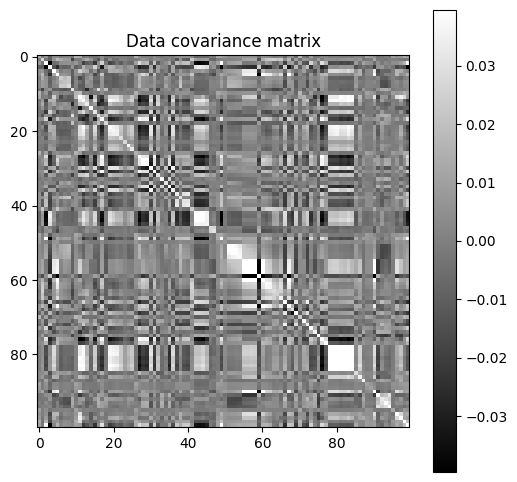

In [22]:
# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2

plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')
plt.savefig('Figure_06_01.png',dpi=300)
plt.show()

공분산 행렬로부터 상관 행렬 계산하기

In [68]:
C = covMat
var = np.diag(covMat)
std = np.sqrt(var)
S = np.diag( 1/std )

R = S @ C @ S
R

array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
         0.46635229,  0.36715738],
       [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
        -0.09436752, -0.0349226 ],
       [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
         0.26079264,  0.63126363],
       ...,
       [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
         0.20664393,  0.15382885],
       [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
         1.        ,  0.34862726],
       [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
         0.34862726,  1.        ]])

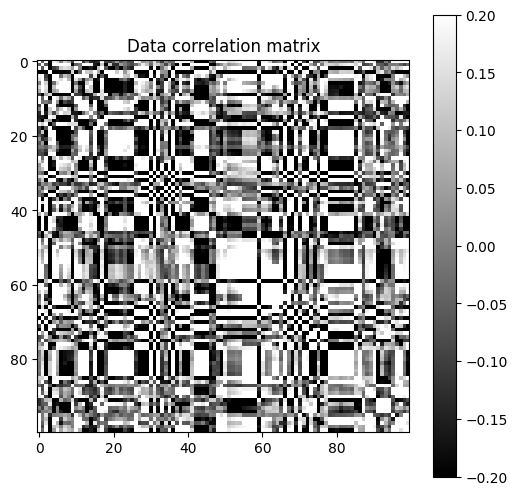

In [69]:
# dynamic color scaling
clim = np.max(np.abs(R)) * .2

plt.figure(figsize=(6,6))
plt.imshow(R,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data correlation matrix')
plt.savefig('Figure_06_01.png',dpi=300)
plt.show()

### 연습 문제 6-2

필자의 상관 행렬

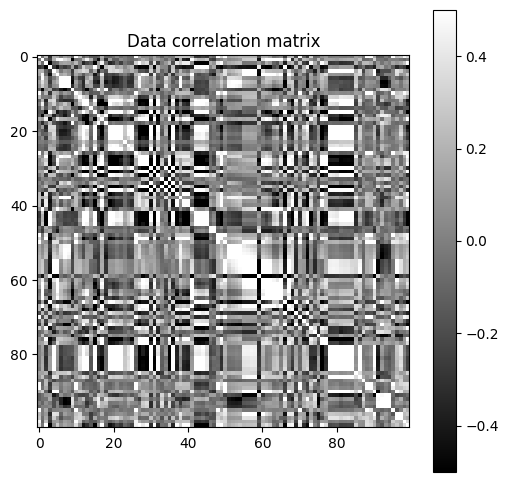

In [89]:
fig,axs = plt.subplots(figsize=(6,6))

h1 = axs.imshow(R,vmin=-.5,vmax=.5,cmap='gray')
plt.colorbar(h1,ax=axs)
plt.title("Data correlation matrix")
plt.savefig('Figure_06_01.png',dpi=300)

plt.show()

Numpy의 상관 행렬

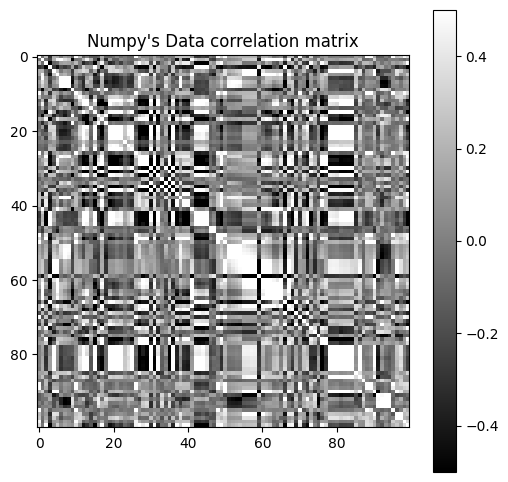

In [87]:
corr = np.corrcoef(dataMat.T)
corr

fig,axs = plt.subplots(figsize=(6,6))

h2 = axs.imshow(corr,vmin=-.5,vmax=.5,cmap='gray')
plt.colorbar(h2,ax=axs)
plt.title("Numpy's Data correlation matrix")
plt.savefig('Figure_06_01.png',dpi=300)

plt.show()

차이 행렬

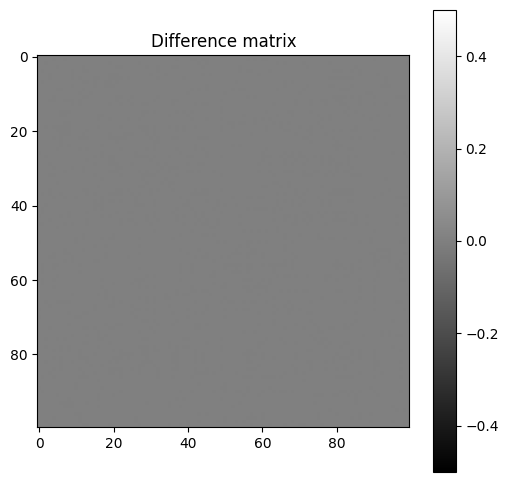

In [90]:
fig,axs = plt.subplots(figsize=(6,6))

h3 = axs.imshow(corr-R,vmin=-.5,vmax=.5,cmap='gray')
plt.colorbar(h3,ax=axs)
plt.title("Difference matrix")
plt.savefig('Figure_06_01.png',dpi=300)

plt.show()

### 6-3 연습 문제

<ipython-input-155-9c9bf9f5d418>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(transformedpoints[0,:], transformedpoints[1,:], 'ko', label = 'Transformed', color = 'b')


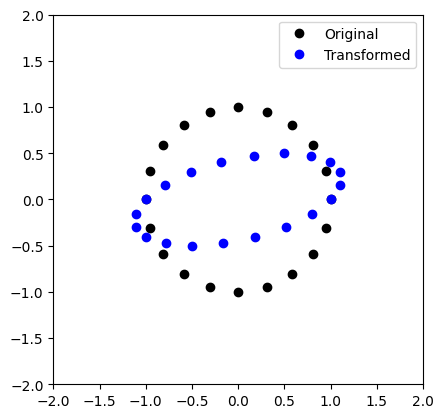

In [155]:
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
points = np.vstack((np.cos(theta), np.sin(theta)))

T = np.array([ [1, 0.5], [0, 0.5] ])
transformedpoints = T@points

plt.plot(points[0,:],points[1,:],'ko',label='Original')
plt.plot(transformedpoints[0,:], transformedpoints[1,:], 'ko', label = 'Transformed', color = 'b')
plt.axis('square')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend()
plt.show()